In [1]:
import os

import pandas as pd

from cell_type_naming import weird_to_nice

# load all the things (tumors and proportions by cell type)

## load the truth (cell type proportions of derek's in silico mixtures)

In [2]:
truth = pd.read_csv(
    "gs://liulab/derek/simulations/experiments/generate_cohorts_for_emma/ctp_sim_0.5sd.txt",
    sep="\t",
    index_col=0
)
truth.rename_axis(columns="cell_type", index="mixture_id", inplace=True)
truth.rename(columns=weird_to_nice, inplace=True)

## derek's preds

In [3]:
def load_csx_results(uri):
    df = pd.read_csv(uri, sep="\t", index_col=0)
    df = df.iloc[:, :-3]  # ignore last three columns, which are test statistics
    df.rename(
        columns=weird_to_nice,
        index=lambda old: int(old.split(".")[-1]),
        inplace=True)
    df.rename_axis(
        columns="cell_type",
        index="mixture_id",
        inplace=True)
    return df


In [4]:
results_derek = load_csx_results(
    "gs://liulab/derek/simulations/experiments/cibersortx/cibersortx_sim_0.5sd/CIBERSORTxGEP_Job3_Fractions-Adjusted.txt")

## my preds

In [5]:
results_docker = load_csx_results("gs://liulab/csx-runs/20210806_215938/out/CIBERSORTx_Results.txt")

## my preds, for each cell exclusion

In [6]:
import glob

experiment_dirs = glob.glob('/mnt/buckets/liulab/csx_experiments_excluding_cell_types/*')
experiment_dirs

['/mnt/buckets/liulab/csx_experiments_excluding_cell_types/without_B',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types/without_CAF',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types/without_Endothelial',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types/without_Macrophage',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types/without_Malignant',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types/without_NK',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types/without_T_CD4',
 '/mnt/buckets/liulab/csx_experiments_excluding_cell_types/without_T_CD8']

In [7]:
os.path.basename(experiment_dirs[0])

'without_B'

## concat all results

In [8]:
dict_of_everything = dict()
dict_of_everything["truth"] = truth
dict_of_everything["derek"] = results_derek
dict_of_everything["me"] = results_docker
dict_of_everything.update({
    os.path.basename(experiment_dir): load_csx_results(os.path.join(experiment_dir, "out", "CIBERSORTx_Results.txt"))
    for experiment_dir in experiment_dirs
})
all_results = pd.concat(
    dict_of_everything,
    names=["source"]
)


In [9]:
all_results.head(5)

cell_type          Malignant  Endothelial       CAF     T CD8        NK  \
source mixture_id                                                         
truth  1               0.725     0.030567  0.053134  0.014234  0.019605   
       2               0.207     0.088145  0.153220  0.041046  0.056533   
       3               0.566     0.048241  0.083856  0.022464  0.030940   
       4               0.841     0.017673  0.030721  0.008230  0.011335   
       5               0.683     0.035236  0.061250  0.016408  0.022599   

cell_type          Macrophage     T CD4         B  
source mixture_id                                  
truth  1             0.025273  0.085953  0.046233  
       2             0.072878  0.247859  0.133320  
       3             0.039885  0.135650  0.072964  
       4             0.014612  0.049697  0.026731  
       5             0.029133  0.099081  0.053294

In [10]:
all_results.sample(20)

cell_type                       Malignant  Endothelial       CAF     T CD8  \
source              mixture_id                                               
without_Macrophage  84           0.411019     0.015744  0.001019  0.047346   
derek               50           0.604163     0.023107  0.056966  0.038427   
                    60           0.450129     0.006625  0.097694  0.020566   
without_CAF         54           0.279186     0.043029       NaN  0.143437   
without_T_CD8       16           0.329342     0.071680  0.022361       NaN   
without_NK          6            0.441326     0.014174  0.221906  0.049703   
me                  50           0.631250     0.018339  0.054826  0.061313   
without_Endothelial 93           0.062364          NaN  0.284790  0.000000   
without_T_CD8       97           0.452639     0.050571  0.066675       NaN   
without_Endothelial 27           0.643583          NaN  0.061085  0.016295   
without_Macrophage  38           0.187046     0.047461  0.204445  0.022150   
without_Malignant   38                NaN     0.046472  0.281319  0.005662   
without_Endothelial 59           0.131587          NaN  0.234615  0.027305   
                    23           0.637031          NaN  0.130029  0.008551   
truth               35           0.886000     0.012671  0.022027  0.005901   
without_B           38           0.131761     0.020819  0.206658  0.035529   
me                  42           0.220500     0.066931  0.019523  0.005529   
                    38           0.132540     0.025076  0.212093  0.043945   
without_T_CD4       80           0.416730     0.042015  0.082646  0.259675   
without_CAF         67           0.287958     0.117422       NaN  0.067132   

cell_type                             NK  Macrophage     T CD4         B  
source              mixture_id                                            
without_Macrophage  84          0.043071         NaN  0.319898  0.161902  
derek               50          0.022557    0.060818  0.171079  0.022883  
                    60          0.015752    0.111279  0.209333  0.088623  
without_CAF         54          0.042387    0.102800  0.353255  0.035906  
without_T_CD8       16          0.142281    0.078375  0.272252  0.083709  
without_NK          6                NaN    0.080324  0.163244  0.029322  
me                  50          0.006186    0.070992  0.153764  0.003329  
without_Endothelial 93          0.127848    0.047879  0.453362  0.023758  
without_T_CD8       97          0.055153    0.056324  0.212041  0.106598  
without_Endothelial 27          0.038511    0.050845  0.148414  0.041267  
without_Macrophage  38          0.048634         NaN  0.341388  0.148877  
without_Malignant   38          0.049637    0.085388  0.487580  0.043943  
without_Endothelial 59          0.098401    0.101308  0.370567  0.036217  
                    23          0.008553    0.037944  0.126868  0.051024  
truth               35          0.008127    0.010477  0.035632  0.019166  
without_B           38          0.034061    0.110733  0.460439       NaN  
me                  42          0.033396    0.100503  0.440550  0.113067  
                    38          0.034901    0.094750  0.387627  0.069069  
without_T_CD4       80          0.036283    0.088876       NaN  0.073776  
without_CAF         67          0.086988    0.101224  0.238374  0.100901

In [11]:
all_results.iloc[::100]

,cell_type,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B
source,mixture_id,,,,,,,,
truth,1,0.725000,0.030567,0.053134,0.014234,0.019605,0.025273,0.085953,0.046233
derek,1,0.634537,0.009402,0.068497,0.013531,0.027027,0.055589,0.154121,0.037297
me,1,0.726018,0.012055,0.040918,0.027831,0.022251,0.039219,0.100657,0.031050
without_B,1,0.735415,0.011654,0.040765,0.017429,0.028057,0.040506,0.126173,NaN
without_CAF,1,0.805597,0.016362,NaN,0.023279,0.027812,0.019182,0.102286,0.005482
without_Endothelial,1,0.767558,NaN,0.053461,0.018163,0.034698,0.021389,0.100384,0.004347
without_Macrophage,1,0.715795,0.009659,0.052566,0.010523,0.032155,NaN,0.110002,0.069301
without_Malignant,1,NaN,0.087711,0.240438,0.104048,0.086024,0.095925,0.371115,0.014738
without_NK,1,0.718767,0.010852,0.048917,0.041266,NaN,0.040119,0.111695,0.028384


In [12]:
all_results.stack().unstack("source").corr()

source,truth,derek,me,without_B,without_CAF,without_Endothelial,without_Macrophage,without_Malignant,without_NK,without_T_CD4,without_T_CD8
source,,,,,,,,,,,
truth,1.000000,0.772707,0.732296,0.693295,0.781906,0.713015,0.751037,0.459737,0.702583,0.694732,0.700931
derek,0.772707,1.000000,0.986093,0.977413,0.977422,0.977141,0.977279,0.802868,0.974246,0.915332,0.977068
me,0.732296,0.986093,1.000000,0.989515,0.983135,0.986748,0.986941,0.775902,0.991468,0.936168,0.989835
without_B,0.693295,0.977413,0.989515,1.000000,0.974782,0.986638,0.979311,0.766964,0.979896,0.931243,0.989108
without_CAF,0.781906,0.977422,0.983135,0.974782,1.000000,0.986185,0.969384,0.810851,0.974890,0.920282,0.970702
without_Endothelial,0.713015,0.977141,0.986748,0.986638,0.986185,1.000000,0.965348,0.793780,0.977591,0.912002,0.978928
without_Macrophage,0.751037,0.977279,0.986941,0.979311,0.969384,0.965348,1.000000,0.686265,0.976869,0.930032,0.979711
without_Malignant,0.459737,0.802868,0.775902,0.766964,0.810851,0.793780,0.686265,1.000000,0.716122,0.244548,0.718650
without_NK,0.702583,0.974246,0.991468,0.979896,0.974890,0.977591,0.976869,0.716122,1.000000,0.956420,0.986794


### upload all results to bigquery for easier plotting

https://console.cloud.google.com/bigquery?project=keen-dispatch-316219

In [13]:
all_results.stack().to_frame("fraction").reset_index().to_gbq("csx_runs.cell_type_exlusion", if_exists='replace')

1it [00:05,  5.46s/it]


# visualize results

In [14]:
import plotly.io
plotly.io.renderers.default = "jupyterlab+png"

import plotly.express as px
import plotly.graph_objects as go

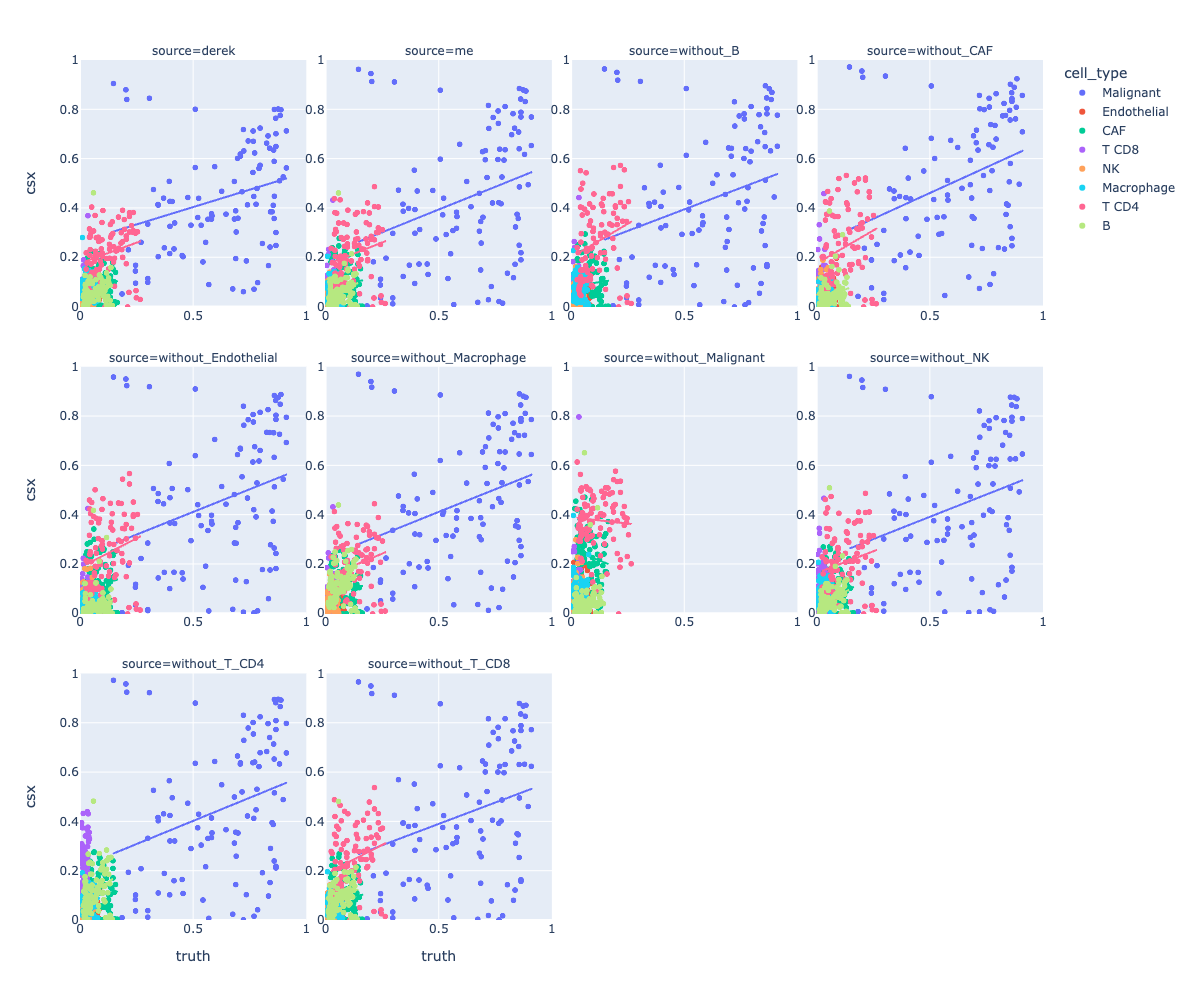

In [15]:
fig = px.scatter(
    pd.concat({
        result: pd.concat({"csx": all_results.stack().loc[result], "truth": all_results.stack().loc["truth"]}, axis=1)
        for result in all_results.index.levels[0] if result != "truth"}).reset_index().rename(columns={"level_0": "source"}),
    x="truth",
    y="csx",
    facet_col="source",
    color="cell_type",
    trendline="ols",
    facet_col_wrap=4
)
fig.update_layout(
    width=1200,
    height=1000,
)
fig.update_xaxes(
    range=(0, 1),
    showticklabels=True,
)
fig.update_yaxes(
    range=(0, 1),
    showticklabels=True,
)
fig

In [16]:
all_results.stack().unstack("source").reset_index()

source,mixture_id,cell_type,truth,derek,me,without_B,without_CAF,without_Endothelial,without_Macrophage,without_Malignant,without_NK,without_T_CD4,without_T_CD8
0,1,Malignant,0.725000,0.634537,0.726018,0.735415,0.805597,0.767558,0.715795,NaN,0.718767,0.730597,0.710906
1,1,Endothelial,0.030567,0.009402,0.012055,0.011654,0.016362,NaN,0.009659,0.087711,0.010852,0.007430,0.011027
2,1,CAF,0.053134,0.068497,0.040918,0.040765,NaN,0.053461,0.052566,0.240438,0.048917,0.051587,0.038594
3,1,T CD8,0.014234,0.013531,0.027831,0.017429,0.023279,0.018163,0.010523,0.104048,0.041266,0.091681,NaN
4,1,NK,0.019605,0.027027,0.022251,0.028057,0.027812,0.034698,0.032155,0.086024,NaN,0.019796,0.031159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,100,T CD8,0.021636,0.022189,0.049809,0.053779,0.050403,0.021847,0.061969,0.066478,0.117246,0.182785,NaN
796,100,NK,0.029799,0.064513,0.064021,0.069515,0.058375,0.069943,0.053016,0.085365,NaN,0.054873,0.073183
797,100,Macrophage,0.038415,0.038568,0.031413,0.058202,0.039881,0.039465,NaN,0.059187,0.042363,0.038445,0.036487
798,100,T CD4,0.130649,0.198272,0.153575,0.220071,0.132830,0.171937,0.138418,0.236659,0.140963,NaN,0.201611


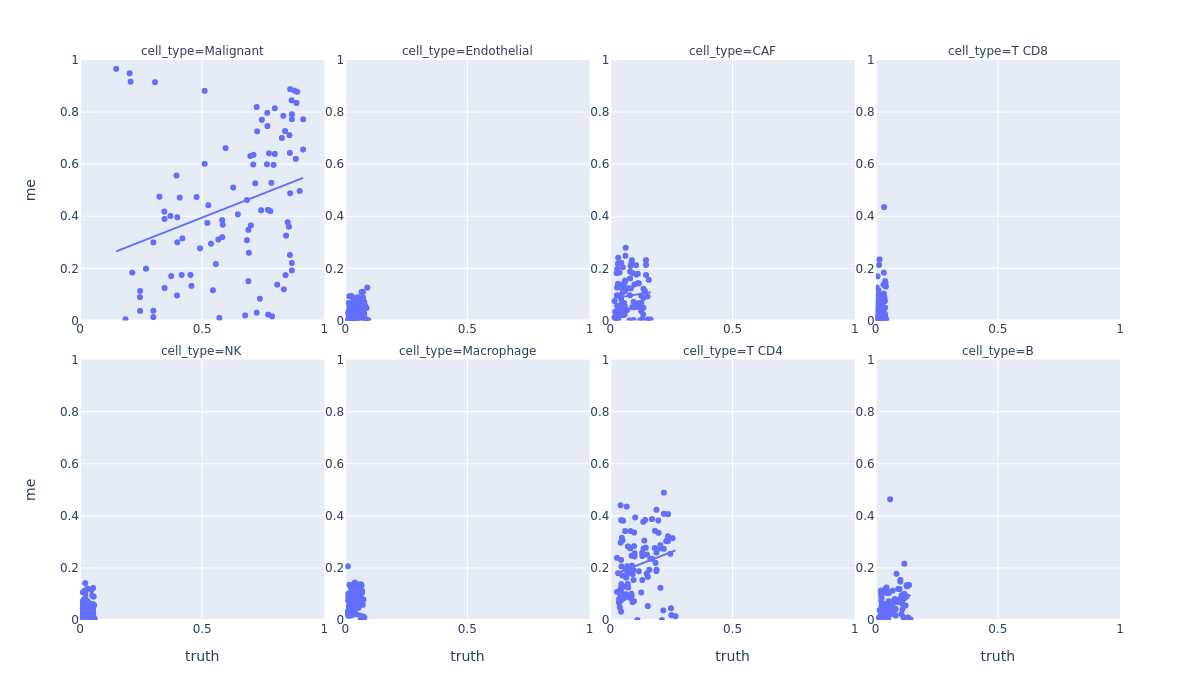

In [17]:
fig = px.scatter(
    all_results.stack().unstack("source").reset_index(),
    x="truth",
    y="me",
    facet_col="cell_type",
    trendline="ols",
    facet_col_wrap=4
)
fig.update_layout(
    width=1200,
    height=700,
)
fig.update_xaxes(
    range=(0, 1),
    showticklabels=True,
)
fig.update_yaxes(
    range=(0, 1),
#     scaleanchor="x", scaleratio=1,
    showticklabels=True,
)
fig

In [18]:
df = pd.concat({
        result: pd.concat({"csx": all_results.stack().loc[result], "truth": all_results.stack().loc["truth"]}, axis=1)
        for result in all_results.index.levels[0] if result != "truth"}).reset_index().rename(columns={"level_0": "source"})
df["absolute error"] = (df["csx"] - df["truth"]).abs()
df["ratio of pred to true"] = (df["csx"]) / (df["truth"] + 1e-10)
import numpy as np
df["log2 ratio of pred to true"] = np.log((df["csx"] + 1e-10) / (df["truth"] + 1e-10)) / np.log(2)
df

,source,mixture_id,cell_type,csx,truth,absolute error,ratio of pred to true,log2 ratio of pred to true
0,derek,1,Malignant,0.634537,0.725000,0.090463,0.875223,-0.192277
1,derek,1,Endothelial,0.009402,0.030567,0.021165,0.307577,-1.700978
2,derek,1,CAF,0.068497,0.053134,0.015363,1.289126,0.366393
3,derek,1,T CD8,0.013531,0.014234,0.000703,0.950615,-0.073067
4,derek,1,NK,0.027027,0.019605,0.007422,1.378578,0.463180
...,...,...,...,...,...,...,...,...
7995,without_T_CD8,100,Macrophage,0.036487,0.038415,0.001928,0.949820,-0.074273
7996,without_T_CD8,100,Malignant,0.316881,0.582000,0.265119,0.544469,-0.877079
7997,without_T_CD8,100,NK,0.073183,0.029799,0.043384,2.455865,1.296231
7998,without_T_CD8,100,T CD4,0.201611,0.130649,0.070962,1.543147,0.625875


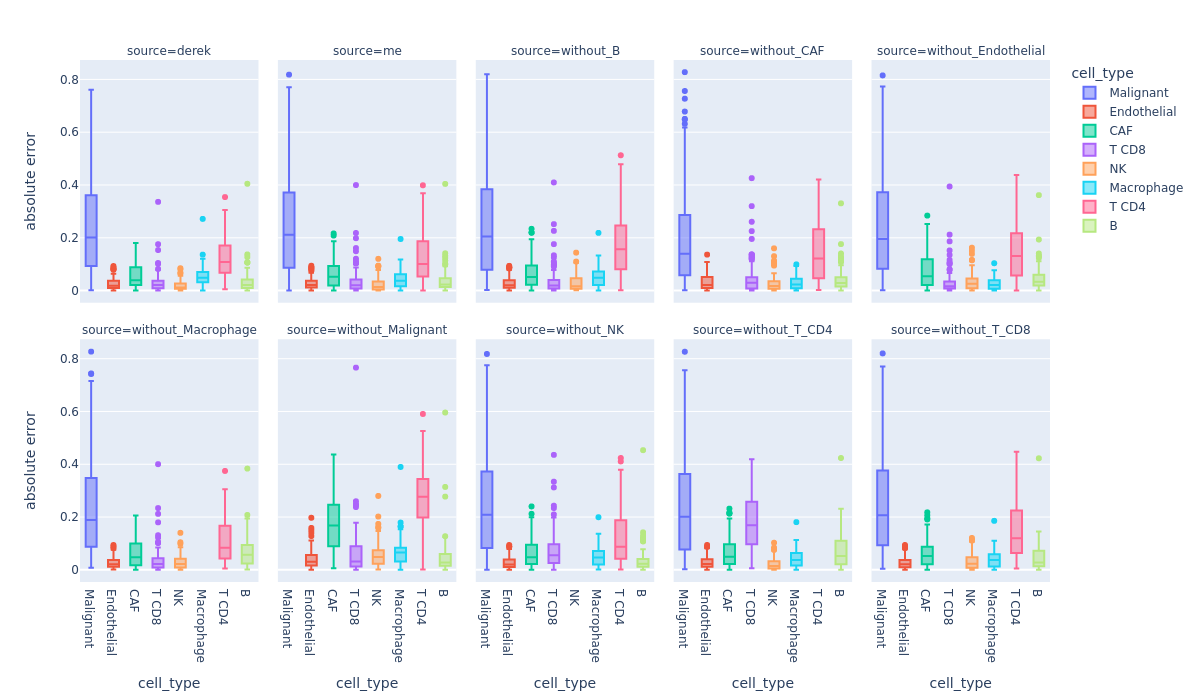

In [19]:
fig = px.box(
    df,
    x="cell_type",
    y="absolute error",
    facet_col="source",
    color="cell_type",
    facet_col_wrap=5
)
fig.update_layout(
    width=1200,
    height=700,
)
fig.show()

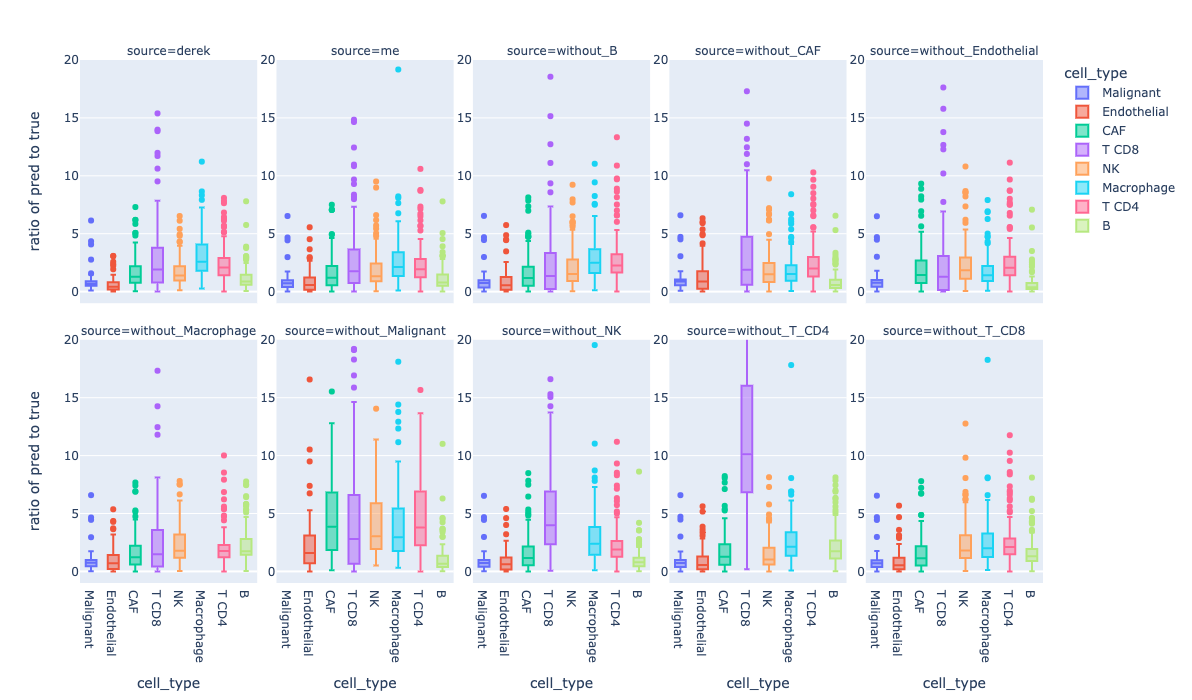

In [20]:
fig = px.box(
    df,
    x="cell_type",
    y="ratio of pred to true",
    facet_col="source",
    color="cell_type",
    facet_col_wrap=5
)
fig.update_yaxes(
    range=(-1, 20),
#     scaleanchor="x", scaleratio=1,
    showticklabels=True,
)
fig.update_layout(
    width=1200,
    height=700,
)
fig.show()

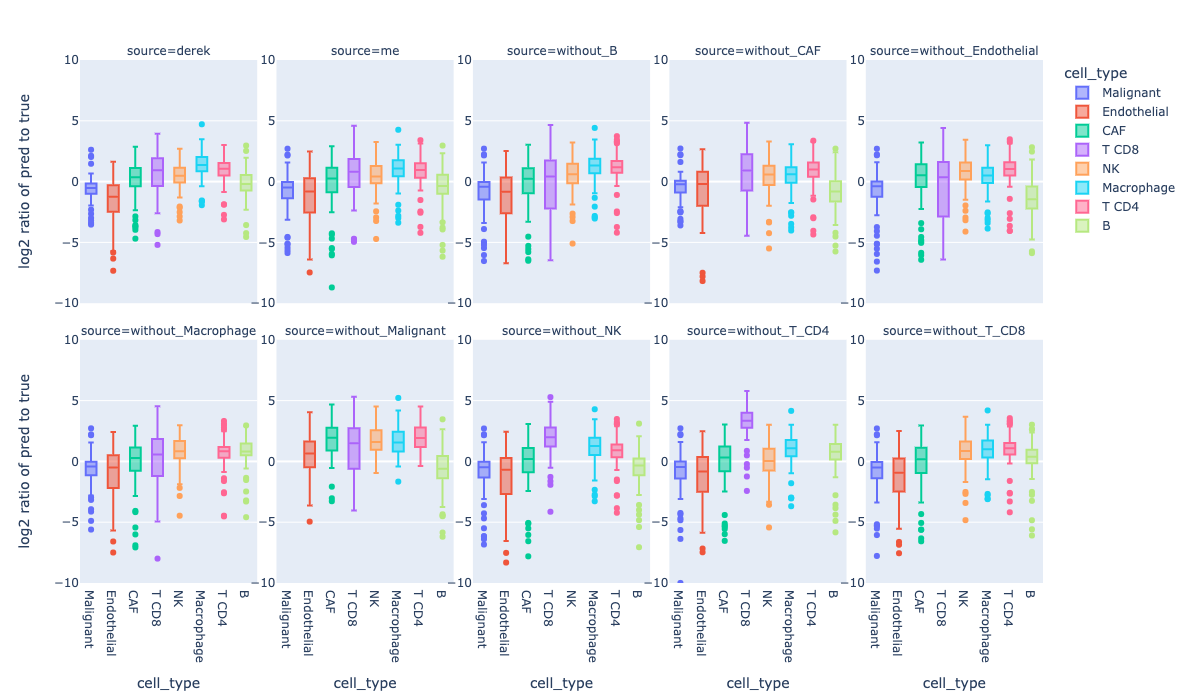

In [21]:
fig = px.box(
    df,
    x="cell_type",
    y="log2 ratio of pred to true",
    facet_col="source",
    color="cell_type",
    facet_col_wrap=5
)
fig.update_yaxes(
    range=(-10, 10),
#     scaleanchor="x", scaleratio=1,
    showticklabels=True,
)
fig.update_layout(
    width=1200,
    height=700,
)
fig.show()

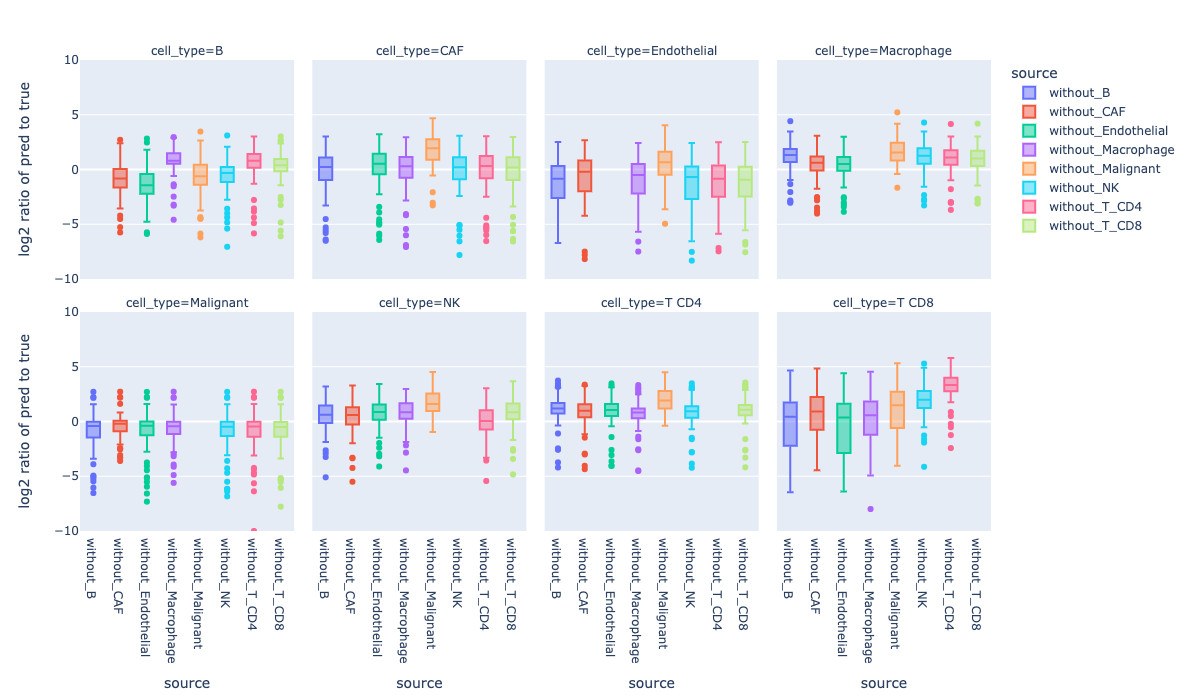

In [22]:
fig = px.box(
    df[df["source"].str.contains("without")],
    x="source",
    y="log2 ratio of pred to true",
    facet_col="cell_type",
    color="source",
    facet_col_wrap=4
)
fig.update_yaxes(
    range=(-10, 10),
#     scaleanchor="x", scaleratio=1,
#     showticklabels=True,
)
fig.update_layout(
    width=1200,
    height=700,
)
fig.show()